<a href="https://www.kaggle.com/code/jiminkim00/space-t?scriptVersionId=92281035" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


### 프로젝트 개요
- 강의명 : 2022년 K-디지털 직업훈련(Training) 사업 - AI데이터플랫폼을 활용한 빅데이터 분석전문가 과정
- 교과목명 : 빅데이터 분석 및 시각화, AI개발 기초, 인공지능 프로그래밍
- 프로젝트 주제 : Spaceship Titanic 데이터를 활용한 탑승유무 분류모형 개발
- 프로젝트 마감일 : 2022년 4월 12일 화요일
- 수강생명 : 김지민

#### 데이터 설명
- 우주선 타이타닉이 시공간 이상과 충돌 하는 동안에 승객이 다른 차원으로 이동했는가에 대한 여부 예측하는 것.
- sample_submission.csv : 올바른 형식의 송신 파일.
- train : 승객이 다른 차원으로 운송되었는지 여부. 예측하려는 대상 열입니다.(훈련데이터로 사용됨)
- test : 테스트 데이터로 사용되는 나머지 승객의 1/3(~4300)에 대한 개인 기록. 작업은 이 세트의 승객에 대한 운송 값을 예측하는 것
- PassengerId - 테스트 세트에 포함된 각 승객의 ID
- Transported - 타겟. 각 승객에 대해 참 또는 거짓을 예측
- HomePlanet - 승객이 출발한 행성으로, 일반적으로 영구 거주지 행성
- CryoSleep - 승객이 항해가 진행되는 동안 일시 정지 애니메이션으로 전환되도록 선택했는지 여부를 나타냅니다. 저온 수면 중인 승객들은 객실에 갇히게 된다.
- Cabin : 승객이 머물고 있는 객실 번호입니다. 갑판/번호/측면 형식을 취합니다. 여기서 측면은 좌현에 P 또는 우현에 S가 될 수 있습니다.
- Destination : 승객이 주차를 해제할 행성입니다.
- VIP - 승객이 여행 중 특별 VIP 서비스에 비용을 지불했는지 여부
- 룸 서비스, 푸드 코트, 쇼핑 몰, 스파, VRDeck - 승객이 우주선 타이타닉의 많은 고급 편의 시설 각각에서 청구한 금액.

## 1. 라이브러리 & 데이터 불러오기
- 버전 확인

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)

sns.set_style('whitegrid')

matplotlib version: 3.5.1
seaborn version: 0.11.2


- 훈련 데이터 : 8693
- 테스트 데이터 : 4277 

In [3]:
import pandas as pd
submission = pd.read_csv("../input/spaceship-titanic/sample_submission.csv")
test = pd.read_csv("../input/spaceship-titanic/test.csv")
df = pd.read_csv("../input/spaceship-titanic/train.csv")

df.shape, test.shape, submission.shape

((8693, 14), (4277, 13), (4277, 2))

### 2. 탐색적 자료 분석 (EDA)
- 데이터 시각화
- 약간의 데이터 전처리

- test, train(df)의 내용 확인.

In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


#### info를 통해 각 목록의 정보 확인.
- train dtypes : bool(1), float64(6), object(7)
- test dtypes : float64(6), object(7)
- Transported : 예측해야할 대상. 각 승객에 대해 참 또는 거짓을 예측

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


- describe() 매서드 사용.
 + train, test : 평균, 카운트, 표준 편차, 백분위수 및 최소-최대 값
 + 탑승객은 평균적으로 28세로 젊은 층이 많이 탑승 해 있다.
 + train, test 둘 다 룸서비스, 푸드코트 등 대부분의 min이나 25%, 50%까지 0의 값이 출력이 되는 점을 확인할 수 있다.
 + -> 결측치가 많아서 0으로 표시가 된건지 정말 0인지 확인이 필요 할 것 같다.

In [9]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


- 목록 별로 단위가 어떻게 이루어지고 있는지 확인.

In [11]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [12]:
test.nunique()

PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64

- Cabin : 각 객실의 위치에 따라서 생존율 분석이 가능 한지 알아보기.
 + 순차적으로 객실 번호 앞(문자)/중간(숫자)/뒤(문자)를 나눠서 새로운 목록 추가

In [13]:
def seperate_cabin(df_temp):
    letters = []
    numbers = []
    final_letters = []
    for idx, row in df_temp.iterrows():
        cabin = str(row["Cabin"])
        #print(cabin)
        if "/" in cabin:
            letters.append(cabin.split("/")[0])
            numbers.append(cabin.split("/")[1])
            final_letters.append(cabin.split("/")[2])
        else:
            letters.append(None)
            numbers.append(-1)
            final_letters.append(None)
    df_temp["letters"] = letters
    df_temp["numbers"] = numbers
    df_temp["final_letters"] = final_letters
    return df_temp
df = seperate_cabin(df)
test = seperate_cabin(test)

- pd.to_numeric() 문자열 칼럼의 숫자형 변환 해주기
 + df.info()로 확인 해본 결과 numbers가 문자열로 인식이 되어 숫자형으로 변환 해주었다.

In [14]:
df["numbers"] = pd.to_numeric(df["numbers"], errors = 'ignore')
test["numbers"] = pd.to_numeric(test["numbers"], errors = 'ignore')

- 확률 점수에 크게 차지 하지 않을 것 같은 목록 제거
 + PassengerId : 가족, 그룹, 혼자 온 사람은 분석이 가능 할 수도 있겠지만ㅍ지금은 필요하지 않아 제거
 + Name : PassengerId로 어느정도 패턴 분석이 된다면 딱히 필요치 않을 것 같음.
 + Cabin을 단위별로 나눠 새로 생성된 목록 letters, numbers, final_letters에 혼동이 올 수 있을 것 같아 제거.

In [15]:
df = df.drop(['PassengerId', 'Cabin', 'Name'], axis=1)

In [16]:
test = test.drop(['PassengerId', 'Cabin', 'Name'], axis=1)

- 약간의 데이터 시각화
 + VIP 비용을 지불한 탑승객 199명 전원이 차원이동에 성공 했음을 알 수 있다.
 + CryoSleep을 한 3,037이 전원 차원 이동 성공 한 걸로 보아 문제가 생기면 바로 차원 이동을 할 수 있게 장치를 해 놓았나 싶다. 

In [17]:
df.groupby('VIP').count()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,letters,numbers,final_letters
VIP,,,,,,,,,,,,,
False,8098,8084,8115,8119,8118,8118,8092,8112,8108,8291,8104,8291,8104
True,194,196,197,198,195,193,194,197,195,199,193,199,193


<AxesSubplot:xlabel='count', ylabel='VIP'>

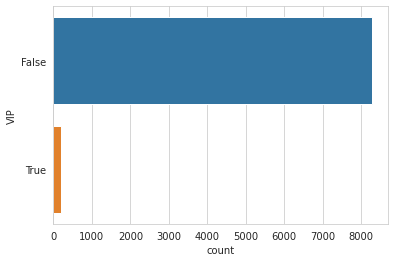

In [18]:
sns.countplot(y='VIP', data=df)

In [19]:
df.groupby('CryoSleep').count()

,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,letters,numbers,final_letters
CryoSleep,,,,,,,,,,,,,
False,5315,5309,5343,5318,5328,5329,5335,5326,5320,5439,5331,5439,5331
True,2962,2989,2955,2962,2969,2967,2941,2972,2975,3037,2953,3037,2953


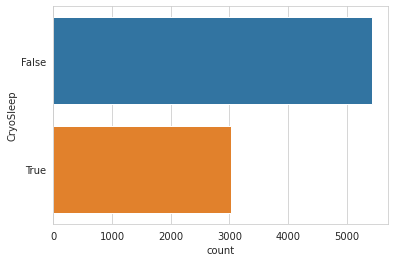

In [20]:
sns.countplot(y='CryoSleep', data=df);

### 시각화

- 차원이동은 성공과 실패가 거의 비슷한 수치이다.
- 소비를 적게 한 사람의 생존율이 더 높고, 룸서비스를 시킨 사람들의 생존율은 낮은 걸로 보인다.
 + 룸 서비스를 많이 시킨 사람들은 룸에 있었기에 방송을 듣고도 객실과 차원이동장 간의 거리가 좀 있었나를 생각하게 된다. (물론 객실 위치에 따라서도 차이가 있을 수도 있겠다.)
  + 몸이 불편하거나 나이가 많으신 분들
 + 소비를 적게 한 사람들은 내부를 구경하거나 하여 방송을 듣고 바로 이동이 가능하여 생존율이 높았나 라는 생각이 든다.


Text(0.5, 1.0, 'Target distribution')

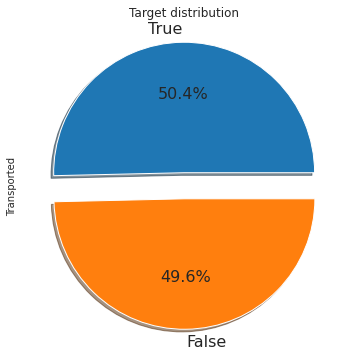

In [21]:
plt.figure(figsize=(6,6))
df['Transported'].value_counts().plot.pie(explode=[0.1,0.1],
                                          autopct='%1.1f%%', shadow=True,
                                          textprops={'fontsize':16}).set_title("Target distribution")

Text(0.5, 0, 'Age')

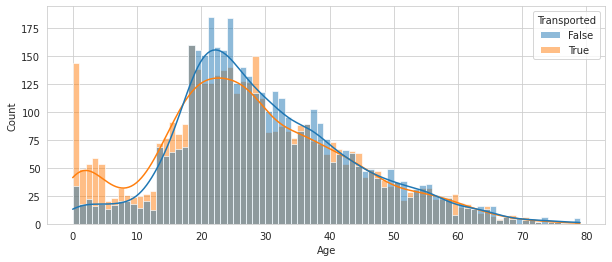

In [22]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='Age', hue='Transported', binwidth=1, kde=True)
plt.xlabel('Age')

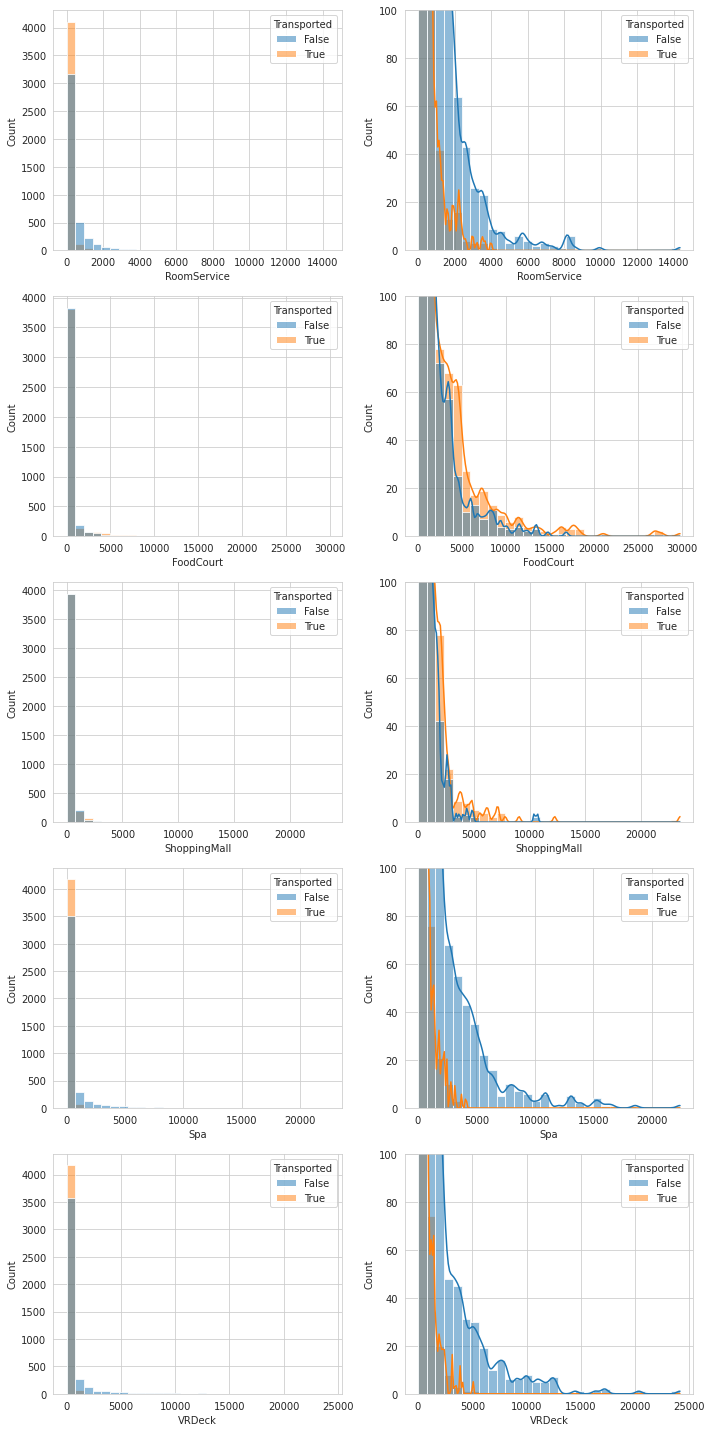

In [23]:
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
fig.tight_layout()  # Improves appearance a bit
plt.show()

## 데이터 전처리
- 결측치 확인

In [24]:
df.isnull().sum()

HomePlanet       201
CryoSleep        217
Destination      182
Age              179
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Transported        0
letters          199
numbers            0
final_letters    199
dtype: int64

In [25]:
test.isnull().sum()

HomePlanet        87
CryoSleep         93
Destination       92
Age               91
VIP               93
RoomService       82
FoodCourt        106
ShoppingMall      98
Spa              101
VRDeck            80
letters          100
numbers            0
final_letters    100
dtype: int64

- 결측치 처리 (SimpleImputer 클래스 사용)
 + 숫자형 데이터 처리

In [26]:
df.dtypes

HomePlanet        object
CryoSleep         object
Destination       object
Age              float64
VIP               object
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Transported         bool
letters           object
numbers            int64
final_letters     object
dtype: object

In [27]:
from sklearn.impute import SimpleImputer

imputer_cols = ["Age", "FoodCourt", "ShoppingMall",
                "Spa", "VRDeck" , "RoomService", "numbers"]
STRATEGY = 'median'

imputer = SimpleImputer(strategy=STRATEGY)
imputer.fit(df[imputer_cols])
df[imputer_cols] = imputer.transform(df[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])

print("df:\n", df.isnull().sum())
print("---")
print("test:\n", test.isnull().sum())

df:
 HomePlanet       201
CryoSleep        217
Destination      182
Age                0
VIP              203
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported        0
letters          199
numbers            0
final_letters    199
dtype: int64
---
test:
 HomePlanet        87
CryoSleep         93
Destination       92
Age                0
VIP               93
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
letters          100
numbers            0
final_letters    100
dtype: int64


- 문자형 데이터 처리

In [28]:
imputer_cols = ["HomePlanet", "CryoSleep", "letters", "Destination", "VIP"]
STRATEGY = 'most_frequent'

imputer = SimpleImputer(strategy=STRATEGY)
imputer.fit(df[imputer_cols])
df[imputer_cols] = imputer.transform(df[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])

print("df:\n", df.isnull().sum())
print("---")
print("test:\n", test.isnull().sum())

df:
 HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported        0
letters          199
numbers            0
final_letters    199
dtype: int64
---
test:
 HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
letters          100
numbers            0
final_letters    100
dtype: int64


- Categorical Feature Encoding

In [29]:
df['Transported'] = df['Transported'].map({True: 1, False: 0})
categorical_cols = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

df = pd.get_dummies(df)
test = pd.get_dummies(test)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        8693 non-null   float64
 1   RoomService                8693 non-null   float64
 2   FoodCourt                  8693 non-null   float64
 3   ShoppingMall               8693 non-null   float64
 4   Spa                        8693 non-null   float64
 5   VRDeck                     8693 non-null   float64
 6   Transported                8693 non-null   int64  
 7   numbers                    8693 non-null   float64
 8   HomePlanet_Earth           8693 non-null   uint8  
 9   HomePlanet_Europa          8693 non-null   uint8  
 10  HomePlanet_Mars            8693 non-null   uint8  
 11  CryoSleep_False            8693 non-null   uint8  
 12  CryoSleep_True             8693 non-null   uint8  
 13  Destination_55 Cancri e    8693 non-null   uint8

### 3. 머신러닝 모형 평가
- 표준화 작업
 + 독립변수, 종속변수 나누기
- 모델은 lightGBm 사용
- 교차검증으로 모델 트레이닝

#### 혼동행렬
- 학습이 완료된 모델의 성능이 얼마나 되는지 숫자로 표현.
- 데이터 프레임 형태의 혼동행렬은 seaborn의 heatmap을 통해 추가적으로 시각화를 할 수 있다.
- 분류 혼동행렬 평가지표
 + accuracy(정확도) : TP+TN/(전체) //// 정확히 모델이 맞춘 데이터
 + precision(정밀도) : TP/(TP+FP) //// 진짜 모델이 맞춘 것(True에 집중)
 + recall(민감도) : TP/(TP+FN) //// 원래 데이터가 True인 것 중에서 모델이 True라고 한것
 + F1 score : 2x(pre*recall)/(pre+recall) //// precision과 recall의 중간값.
- 다중 혼동행렬
 + 세가지 이상의 반응변수 값을 갖는 분류 모델
 + 다중분류 모델의 성능을 평가하기 위해서는 클래스들(반응변수들) 중 하나를 positive 기준으로 삼고 나머지를 negative 기준으로 두는 이진분류 모델들을 구해야 한다. 이 때 각 모델들에 대한 혼동행렬을 구하고 각 혼동행렬에서 나오는 성능 측정 지표들의 평균을 구함으로써 다중분류 모델의 성능 측정 지표값을 구한다. 파이썬에서는 Scikit Learn의 분류값의 타입이 multiclass인 경우에는 labels 파라미터에 전체 분류값을 리스트로 입력해주어야 한다.

- 표준화 작업

In [30]:
X_cols = test.columns
X = df[X_cols].to_numpy()
y = df['Transported'].to_numpy()
X.shape, y.shape

((8693, 27), (8693,))

- 훈련세트와 검증 세트로 나누기 
 + 훈련 세트 6,954, 검증 세트 1,739

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(6954, 27) (1739, 27) (6954,) (1739,)


- 모형 평가
- cross_validata() 활용
- 5-폴드와 10-폴드로 실행 해본 결과 train과 test의 정확도 차이가 그리 많이 나지는 않지만 그래도 10-폴드가 조금 더 높았다.
 + Test : 0.795
 + train : 0.856

In [32]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

lgb = LGBMClassifier(random_state=0)
lgb

splitter = StratifiedKFold(n_splits = 5, shuffle = True, random_state=0)
scores = cross_validate(lgb, X_train, y_train, return_train_score = True, cv=splitter)

print("train Acc.", np.mean(scores['train_score']))
print("test Acc.", np.mean(scores['test_score']))

train Acc. 0.9026818290665203
test Acc. 0.8074498445815597


In [33]:
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state=0)
scores = cross_validate(lgb, X_train, y_train, return_train_score = True, cv=splitter)

print("train Acc.", np.mean(scores['train_score']))
print("test Acc.", np.mean(scores['test_score']))

train Acc. 0.8938420869537511
test Acc. 0.8071646820474655


- 검증 데이터 활용 정확도 확인

In [34]:
from sklearn.metrics import accuracy_score

lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_val)
print("Acc.", accuracy_score(y_val, y_pred))

Acc. 0.8096607245543416


### 4. 제출

In [35]:
test_preds = lgb.predict(test.to_numpy())
submission['Transported'] = test_preds.astype("bool")
submission.to_csv("submission.csv",index=False)
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


### 참고

- Samuel Cortinhas/Spaceship Titanic: A complete guide
 + https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide